In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 30)
sns.set(style="whitegrid", rc={"figure.figsize": (12, 9)})

In [2]:
originalData = pd.read_csv("Data.csv")
originalData

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score
0,CUST00001,39,Delhi,Returning,ORD000001,00:04:52,4015.21,Net Banking,9,5,No,Jackets,SKU0001,XXL,In Stock,Word of Mouth,36
1,CUST00002,52,Hyderabad,Returning,ORD000002,00:39:38,2205.61,Credit Card,3,15,No,T-Shirts,SKU0002,S,Out of Stock,Google Ads,37
2,CUST00003,29,Pune,Returning,ORD000003,00:15:19,858.84,Net Banking,8,30,No,T-Shirts,SKU0003,L,In Stock,Email Marketing,95
3,CUST00004,15,Jaipur,Returning,ORD000004,00:52:58,500.00,UPI,1,0,No,T-Shirts,SKU0004,XXL,In Stock,Word of Mouth,10
4,CUST00005,43,Pune,Returning,ORD000005,00:17:40,1843.50,Wallet,9,40,Yes,Sweatshirts,SKU0005,L,In Stock,Word of Mouth,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CUST00996,4,Mumbai,New,ORD000996,00:10:16,4043.83,Wallet,5,15,Yes,Shirts,SKU0996,XXL,In Stock,Google Ads,38
996,CUST00997,1,Chennai,New,ORD000997,00:43:04,3531.79,Credit Card,2,0,No,T-Shirts,SKU0997,S,In Stock,Facebook Ads,44
997,CUST00998,49,Delhi,Returning,ORD000998,00:38:23,3129.50,Net Banking,4,20,Yes,Jackets,SKU0998,XL,In Stock,Instagram,77
998,CUST00999,40,Mumbai,Returning,ORD000999,00:54:47,1934.51,Net Banking,2,20,No,Shirts,SKU0999,XXL,In Stock,Word of Mouth,80


In [3]:
data = originalData.copy()
data

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score
0,CUST00001,39,Delhi,Returning,ORD000001,00:04:52,4015.21,Net Banking,9,5,No,Jackets,SKU0001,XXL,In Stock,Word of Mouth,36
1,CUST00002,52,Hyderabad,Returning,ORD000002,00:39:38,2205.61,Credit Card,3,15,No,T-Shirts,SKU0002,S,Out of Stock,Google Ads,37
2,CUST00003,29,Pune,Returning,ORD000003,00:15:19,858.84,Net Banking,8,30,No,T-Shirts,SKU0003,L,In Stock,Email Marketing,95
3,CUST00004,15,Jaipur,Returning,ORD000004,00:52:58,500.00,UPI,1,0,No,T-Shirts,SKU0004,XXL,In Stock,Word of Mouth,10
4,CUST00005,43,Pune,Returning,ORD000005,00:17:40,1843.50,Wallet,9,40,Yes,Sweatshirts,SKU0005,L,In Stock,Word of Mouth,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CUST00996,4,Mumbai,New,ORD000996,00:10:16,4043.83,Wallet,5,15,Yes,Shirts,SKU0996,XXL,In Stock,Google Ads,38
996,CUST00997,1,Chennai,New,ORD000997,00:43:04,3531.79,Credit Card,2,0,No,T-Shirts,SKU0997,S,In Stock,Facebook Ads,44
997,CUST00998,49,Delhi,Returning,ORD000998,00:38:23,3129.50,Net Banking,4,20,Yes,Jackets,SKU0998,XL,In Stock,Instagram,77
998,CUST00999,40,Mumbai,Returning,ORD000999,00:54:47,1934.51,Net Banking,2,20,No,Shirts,SKU0999,XXL,In Stock,Word of Mouth,80


In [4]:
data.ndim

2

In [5]:
data.shape

(1000, 17)

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

customer_id          0
customer_tenure      0
customer_location    0
customer_type        0
order_id             0
order_date           0
order_value          0
payment_method       0
order_frequency      0
discount_applied     0
return_status        0
product_category     0
product_sku          0
size                 0
inventory_status     0
source               0
engagement_score     0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        1000 non-null   object 
 1   customer_tenure    1000 non-null   int64  
 2   customer_location  1000 non-null   object 
 3   customer_type      1000 non-null   object 
 4   order_id           1000 non-null   object 
 5   order_date         1000 non-null   object 
 6   order_value        1000 non-null   float64
 7   payment_method     1000 non-null   object 
 8   order_frequency    1000 non-null   int64  
 9   discount_applied   1000 non-null   int64  
 10  return_status      1000 non-null   object 
 11  product_category   1000 non-null   object 
 12  product_sku        1000 non-null   object 
 13  size               1000 non-null   object 
 14  inventory_status   1000 non-null   object 
 15  source             1000 non-null   object 
 16  engagement_score   1000 n

In [9]:
data.customer_id.nunique()

1000

In [10]:
data.order_id.nunique()

1000

In [11]:
data.product_sku.nunique()

1000

# Customer Behavior
-------

## Purchase Patterns

- What are the most common product categories purchased by different customer types?
- How does customer tenure influence order frequency and order value?


## Order Frequency

- What is the average order frequency for different customer segments (e.g., by location or type)?
- How does the engagement score correlate with order frequency?

## Customer Lifetime Value (CLV)

- How can we calculate the CLV for different customer segments based on their order history?
- What factors (e.g., payment method, discounts applied) have the most significant impact on CLV?

# Sales Performance
-----

## Top-Performing Products
- Which product categories generate the highest revenue?
- What are the top-selling products by order value and frequency?

## Seasonal Trends
- Are there specific months or seasons where certain product categories see increased sales?
- How do sales trends vary across different customer locations throughout the year?

## Revenue Drivers

- What payment methods are associated with higher order values?
- How do discounts applied affect overall sales performance?

# Marketing Effectiveness
------
## Impact of Marketing Channels
- Which marketing channels (e.g., Instagram, Google Ads) lead to higher conversion rates?
- How do engagement scores vary among customers acquired through different marketing channels?
## Channel Performance Analysis
- What is the average order value for customers acquired through each marketing channel?
- Are there differences in return rates based on the marketing channel used for acquisition?

# Return Analysis
------
## Correlation Between Discounts and Returns
- Is there a relationship between the amount of discount applied and return rates?
- How do return rates differ across various product categories?
## Return Status Insights
- What are the common characteristics of products that have high return rates (e.g., size, inventory status)?
- How does customer tenure affect return behavior?

# Inventory Insights
-----
## Stockout Risks
- Which products are at risk of stockouts based on current inventory levels and order frequency?
- How can we identify trends in inventory status that may indicate potential stockout risks?
## Predictive Model for Inventory Optimization
- What factors should be included in a predictive model to optimize inventory levels?
- How can historical order data be used to forecast future inventory needs effectively?

--------

---------------------

## Customer Behavior
## Purchase Patterns
### What are the most common product categories purchased by different customer types?

In [12]:
# What are the most common product categories purchased by different customer types?
groupedData = data.groupby(['customer_type', 'product_category'])['product_category'].count().sort_values(ascending=False).unstack(fill_value=0)
groupedData

product_category,Dresses,Jackets,Jeans,Shirts,Sweatshirts,T-Shirts
customer_type,,,,,,
New,29,39,27,34,30,31
Returning,137,136,146,135,118,138


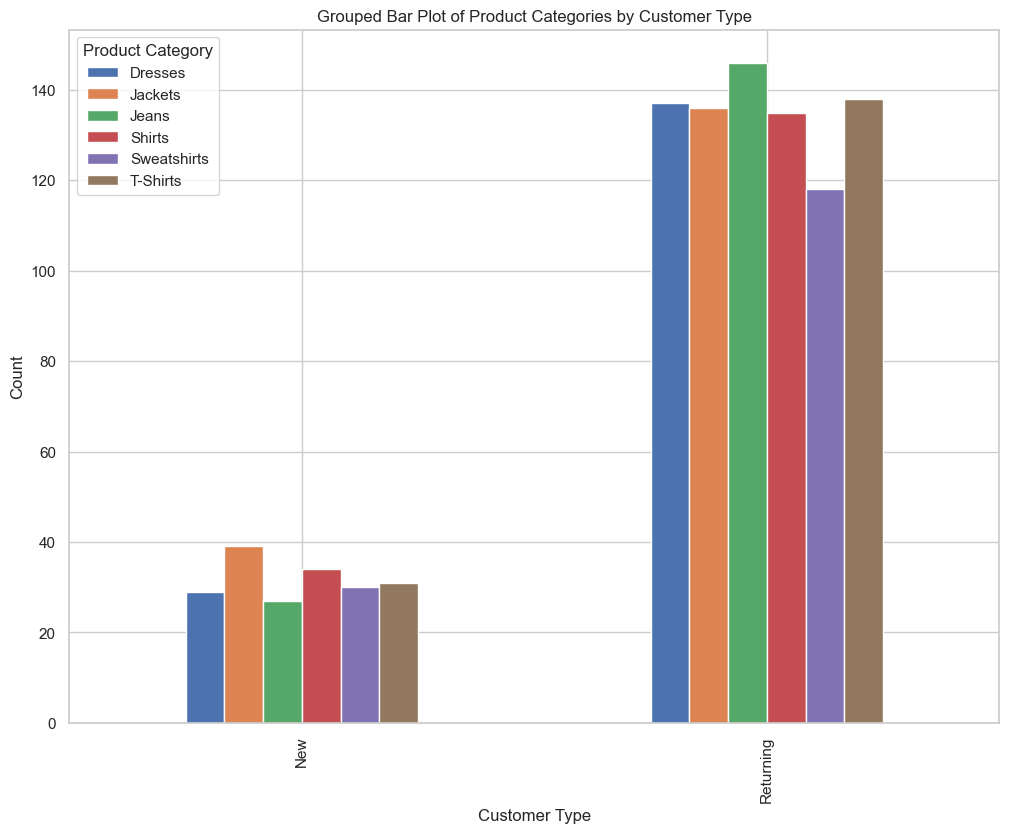

In [13]:
groupedData.plot(kind='bar', figsize=(12,9))
plt.title('Grouped Bar Plot of Product Categories by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Product Category')
plt.show()

#### The most common product for the returning custormers is the Jeans and for the new customers it is Jackets.

### How does customer tenure influence order frequency and order value?

In [14]:
bins = [0, 15, 30, 45, 60]
labels = ['Very Low', 'Low', 'Medium', 'High']
data['tenure_category'] = pd.cut(data['customer_tenure'], bins=bins, labels=labels)
data.head()

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score,tenure_category
0,CUST00001,39,Delhi,Returning,ORD000001,00:04:52,4015.21,Net Banking,9,5,No,Jackets,SKU0001,XXL,In Stock,Word of Mouth,36,Medium
1,CUST00002,52,Hyderabad,Returning,ORD000002,00:39:38,2205.61,Credit Card,3,15,No,T-Shirts,SKU0002,S,Out of Stock,Google Ads,37,High
2,CUST00003,29,Pune,Returning,ORD000003,00:15:19,858.84,Net Banking,8,30,No,T-Shirts,SKU0003,L,In Stock,Email Marketing,95,Low
3,CUST00004,15,Jaipur,Returning,ORD000004,00:52:58,500.00,UPI,1,0,No,T-Shirts,SKU0004,XXL,In Stock,Word of Mouth,10,Very Low
4,CUST00005,43,Pune,Returning,ORD000005,00:17:40,1843.50,Wallet,9,40,Yes,Sweatshirts,SKU0005,L,In Stock,Word of Mouth,0,Medium


In [15]:
correlation_frequency = data['customer_tenure'].corr(data['order_frequency'])
correlation_value = data['customer_tenure'].corr(data['order_value'])
correlation_frequency, correlation_value

(-0.014211787586921187, 0.021312686605101855)

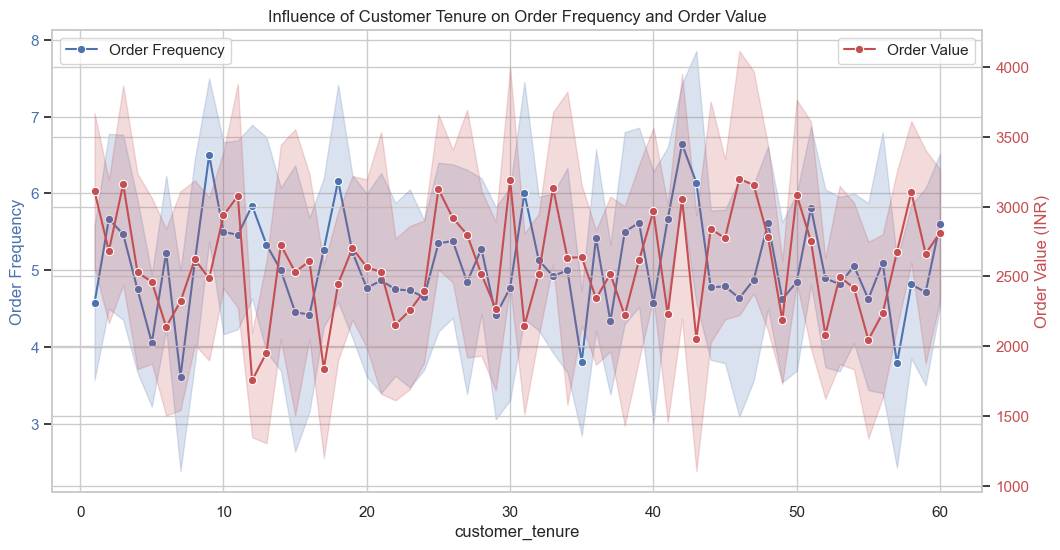

In [16]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(data, x='customer_tenure', y='order_frequency', marker='o', ax=ax1, color='b', label='Order Frequency')
ax1.set_ylabel('Order Frequency', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
sns.lineplot(data, x='customer_tenure', y='order_value', marker='o', ax=ax2, color='r', label='Order Value')
ax2.set_ylabel('Order Value (INR)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Influence of Customer Tenure on Order Frequency and Order Value')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Kruskal-Wallis H-statistic: 0.833499470888413
Kruskal-Wallis p-value: 0.8414387518140564
Fail to reject the null hypothesis: There is no significant difference in order values among the tenure categories.


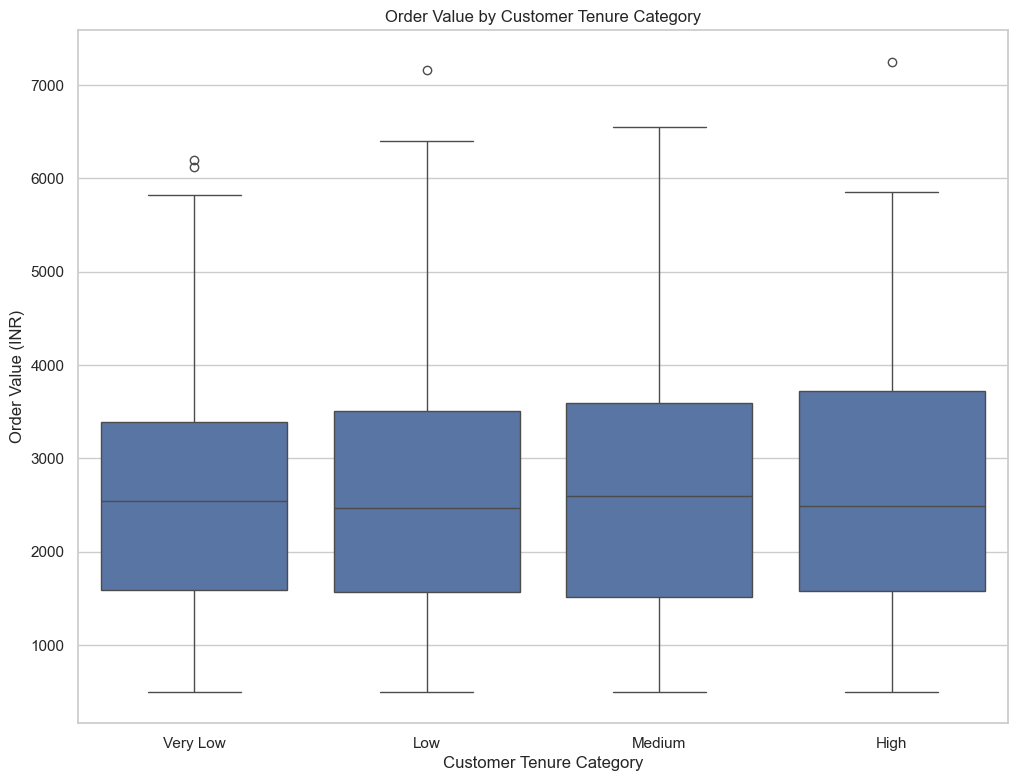

In [17]:
groups = [group['order_value'].values for name, group in data.groupby('tenure_category', observed=True)]
H_statistic, p_value = stats.kruskal(*groups)

print('=========================================')
print("Kruskal-Wallis H-statistic:", H_statistic)
print("Kruskal-Wallis p-value:", p_value)

print('=========================================')
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in order values among the tenure categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in order values among the tenure categories.")

print('=========================================')
sns.boxplot(x='tenure_category', y='order_value', data=data)
plt.title('Order Value by Customer Tenure Category')
plt.xlabel('Customer Tenure Category')
plt.ylabel('Order Value (INR)')
plt.show()

Kruskal-Wallis H-statistic: 0.7427875563531878
Kruskal-Wallis p-value: 0.8630966648723487
Fail to reject the null hypothesis: There is no significant difference in order values among the tenure categories.


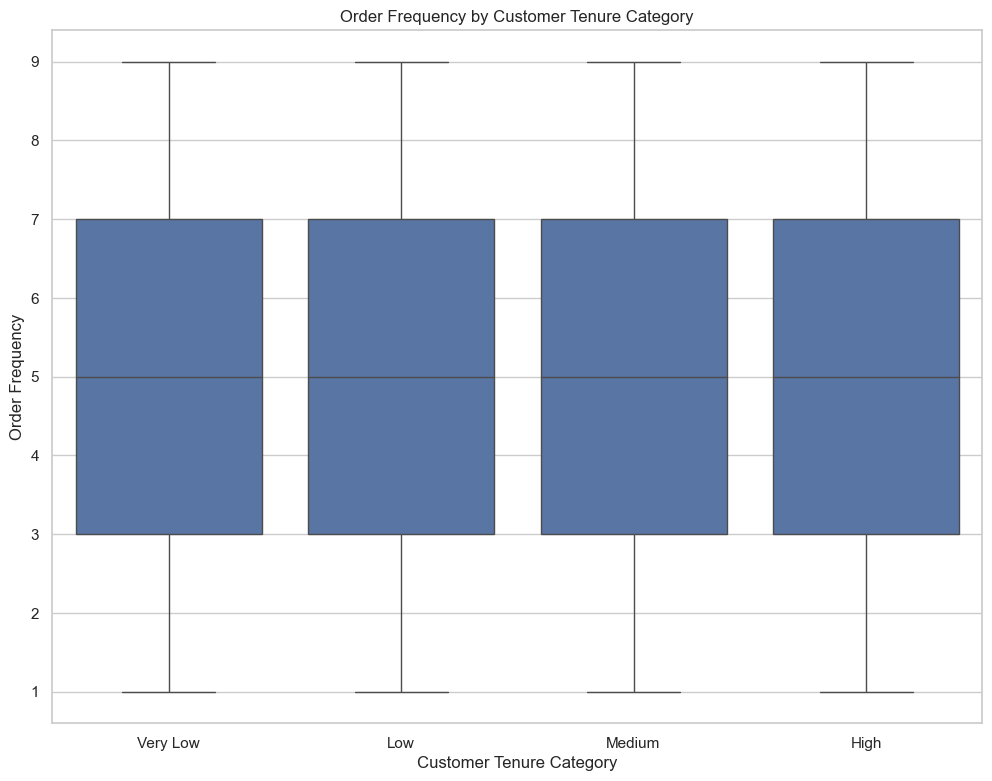

In [18]:
groups = [group['order_frequency'].values for name, group in data.groupby('tenure_category', observed=True)]
H_statistic, p_value = stats.kruskal(*groups)

print('=========================================')
print("Kruskal-Wallis H-statistic:", H_statistic)
print("Kruskal-Wallis p-value:", p_value)

print('=========================================')
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in order values among the tenure categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in order values among the tenure categories.")

print('=========================================')
sns.boxplot(x='tenure_category', y='order_frequency', data=data)
plt.title('Order Frequency by Customer Tenure Category')
plt.xlabel('Customer Tenure Category')
plt.ylabel('Order Frequency')
plt.show()

#### There is no significance influence from the customer tenure to order value or order frequency.

## Order Frequency
## What is the average order frequency for different customer segments (e.g., by location or type)?

In [19]:
# What is the average order frequency for different customer segments (e.g., by location or type)?
mean_order_frequency_location = data.groupby('customer_location')['order_frequency'].mean().sort_values(ascending=False).reset_index()
mean_order_frequency_location

,customer_location,order_frequency
0,Hyderabad,5.140187
1,Mumbai,5.124031
2,Bangalore,5.113636
3,Kolkata,5.090226
4,Jaipur,5.062500
5,Pune,5.007353
6,Delhi,4.893130
7,Chennai,4.833333


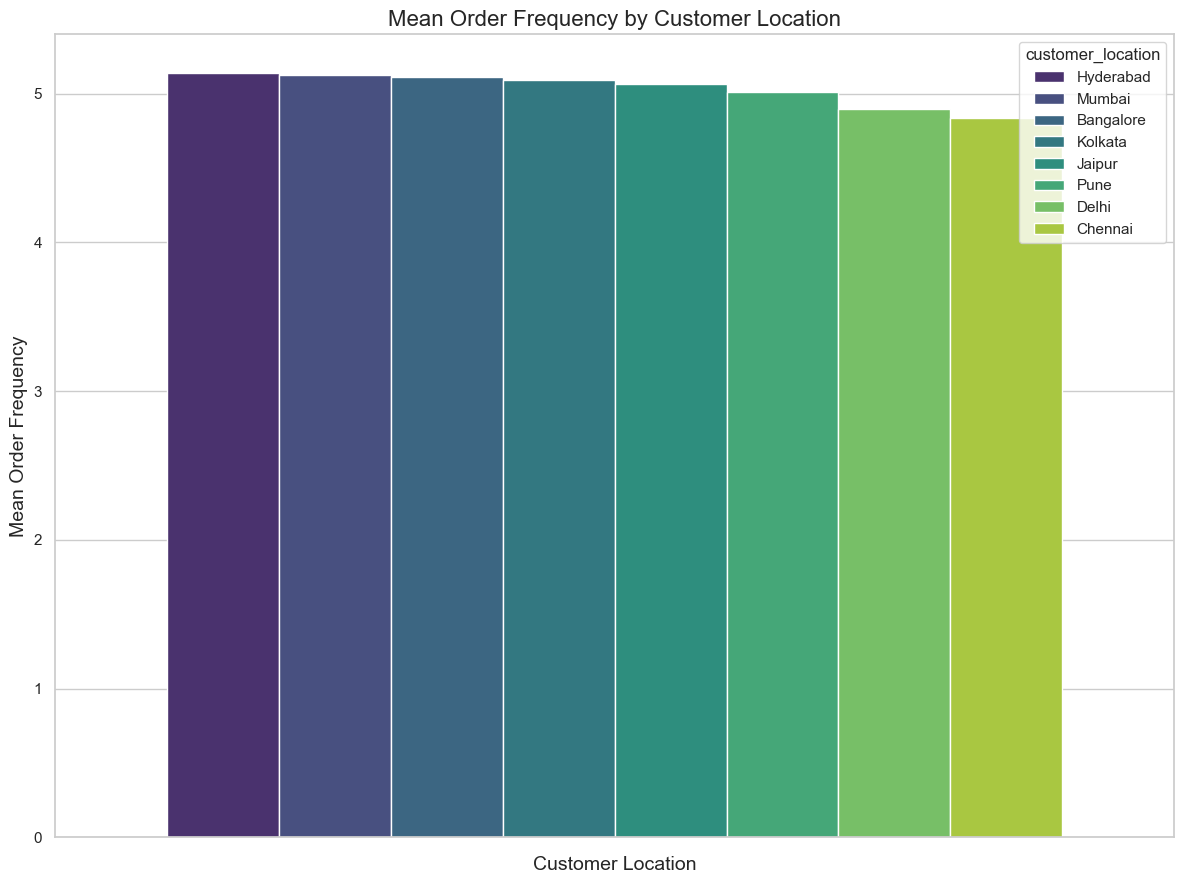

In [20]:
sns.barplot(hue='customer_location', y='order_frequency', data=mean_order_frequency_location, palette='viridis', legend=True)

plt.title('Mean Order Frequency by Customer Location', fontsize=16)
plt.xlabel('Customer Location', fontsize=14)
plt.ylabel('Mean Order Frequency', fontsize=14)

plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [21]:
# What is the average order frequency for different customer segments (e.g., by location or type)?
mean_order_frequency_type = data.groupby('customer_type')['order_frequency'].mean().sort_values(ascending=False).reset_index()
mean_order_frequency_type

,customer_type,order_frequency
0,New,5.157895
1,Returning,5.002469


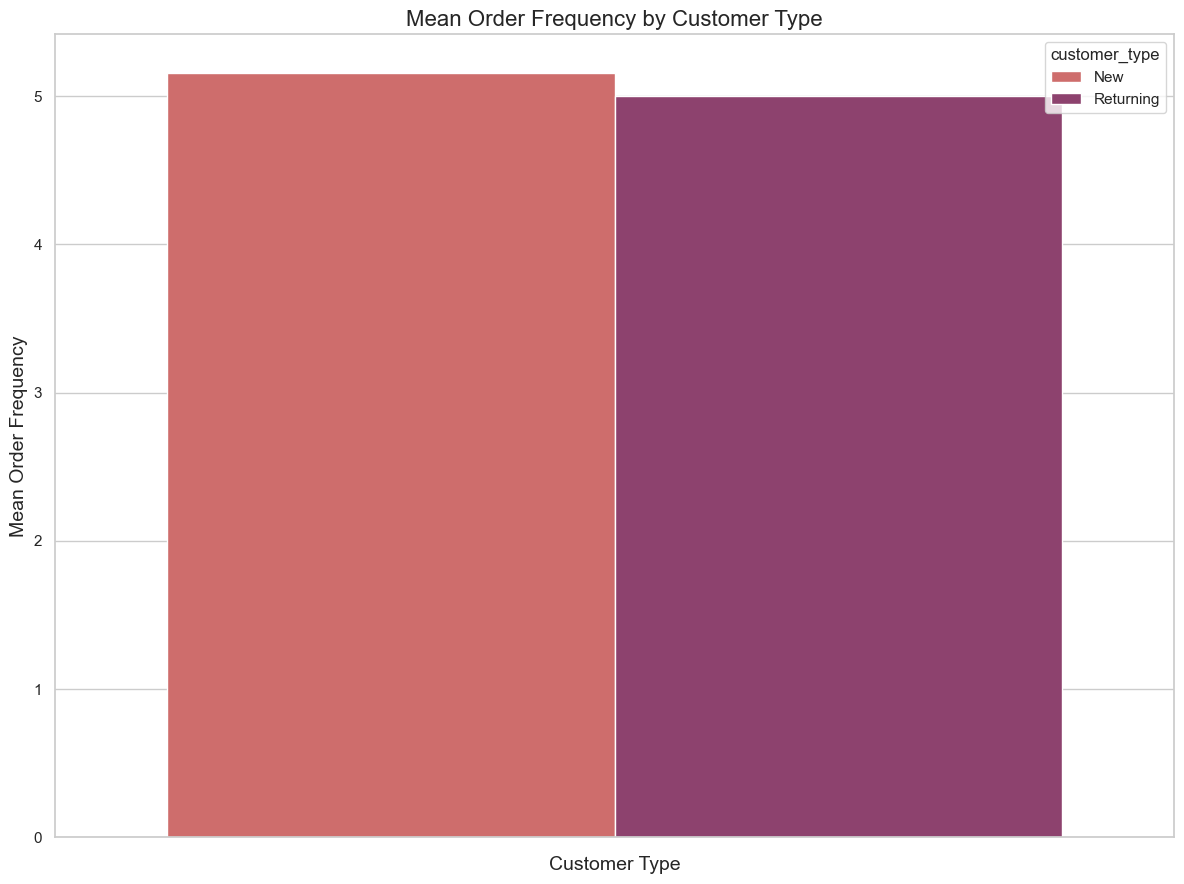

In [22]:
sns.barplot(hue='customer_type', y='order_frequency', data=mean_order_frequency_type, palette='flare', legend=True)

plt.title('Mean Order Frequency by Customer Type', fontsize=16)
plt.xlabel('Customer Type', fontsize=14)
plt.ylabel('Mean Order Frequency', fontsize=14)

plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

## How does the engagement score correlate with order frequency?

Kruskal-Wallis H-statistic: 12.24088476133294
Kruskal-Wallis p-value: 0.14077546618920106
Fail to reject the null hypothesis: There is no significant difference in order values among the tenure categories.


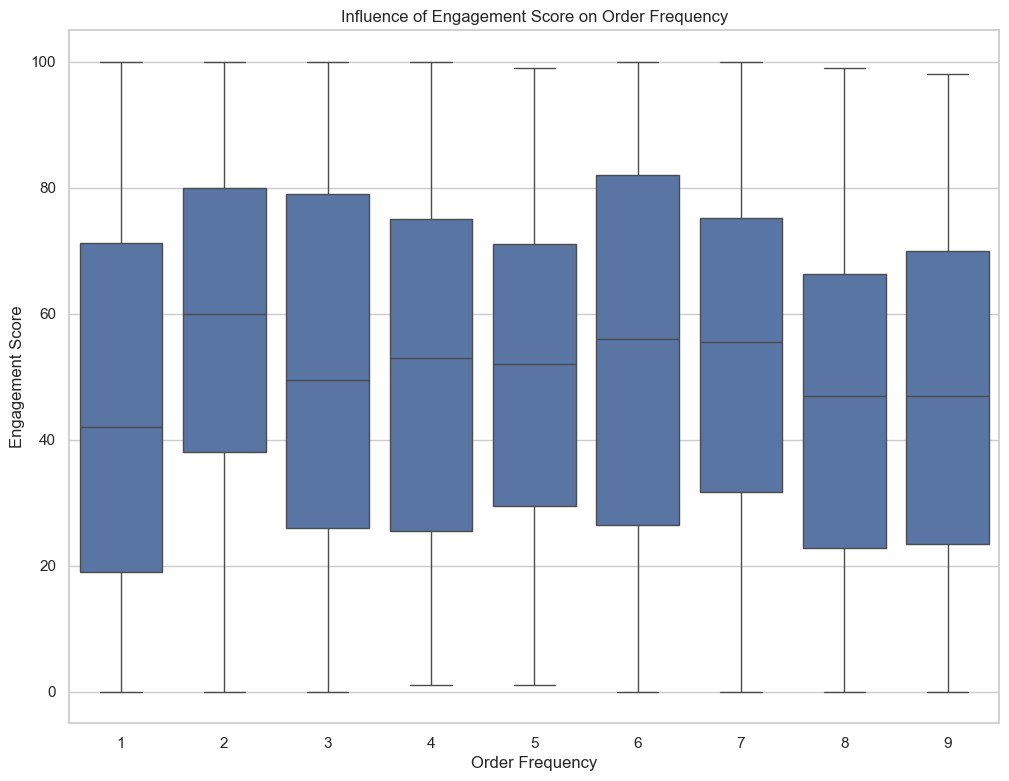

In [23]:
groups = [group['engagement_score'].values for name, group in data.groupby('order_frequency', observed=True)]
H_statistic, p_value = stats.kruskal(*groups)

print('=========================================')
print("Kruskal-Wallis H-statistic:", H_statistic)
print("Kruskal-Wallis p-value:", p_value)

print('=========================================')
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in order values among the tenure categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in order values among the tenure categories.")

print('=========================================')
sns.boxplot(x='order_frequency', y='engagement_score', data=data)
plt.title('Influence of Engagement Score on Order Frequency')
plt.xlabel('Order Frequency')
plt.ylabel('Engagement Score')
plt.show()

## Customer Lifetime Value (CLV)
## How can we calculate the CLV for different customer segments based on their order history?

In [24]:
returning_customer = data[data['customer_type'] == 'Returning']
new_customer = data[data['customer_type'] == 'New']

In [25]:
returning_customer.loc[:,'customer_lifetime_value'] = returning_customer.loc[:,'order_frequency'] * returning_customer.loc[:,'order_value']

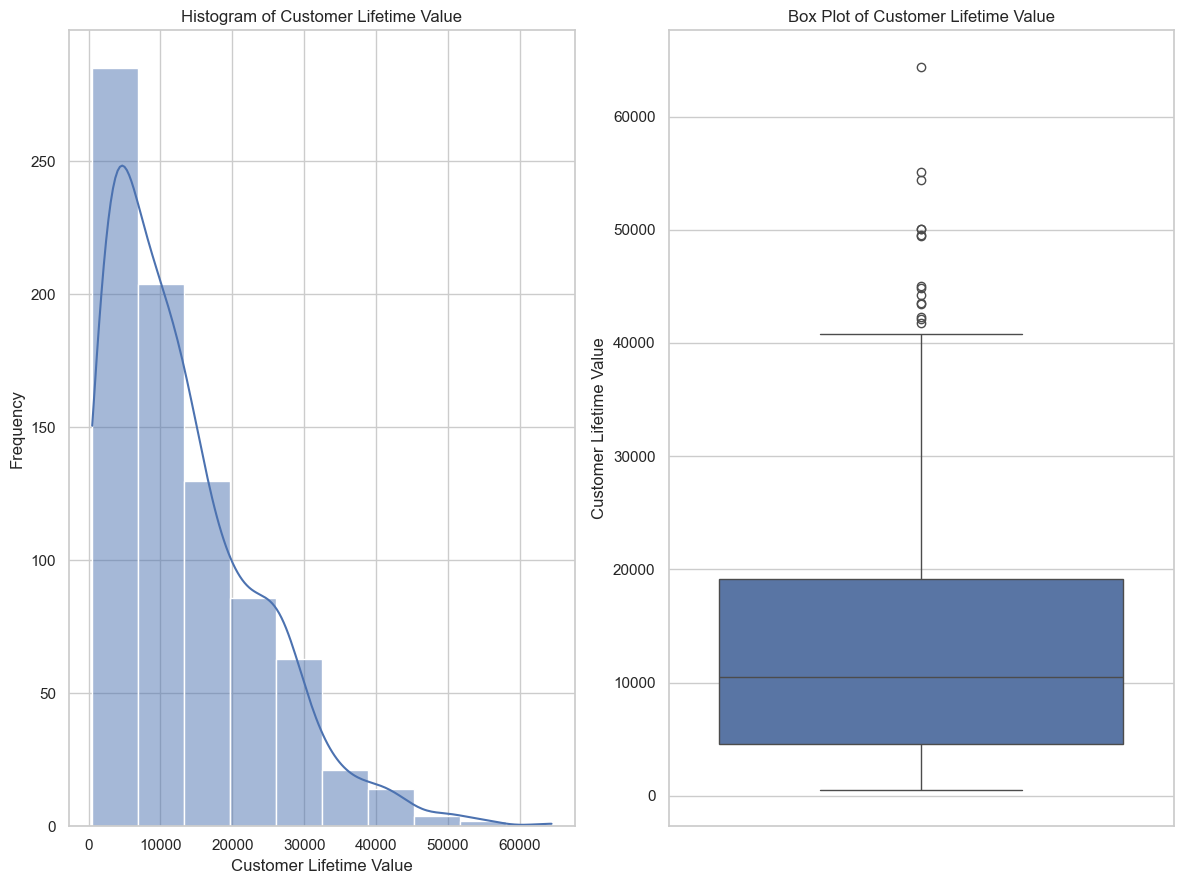

In [26]:
plt.subplot(1, 2, 1) 
sns.histplot(returning_customer['customer_lifetime_value'], bins=10, kde=True)
plt.title('Histogram of Customer Lifetime Value')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  
sns.boxplot(y=returning_customer['customer_lifetime_value'])
plt.title('Box Plot of Customer Lifetime Value')
plt.ylabel('Customer Lifetime Value')

plt.tight_layout() 
plt.show()

In [27]:
new_customer.loc[:,'customer_lifetime_value'] = new_customer.loc[:,'order_frequency'] * new_customer.loc[:,'order_value']

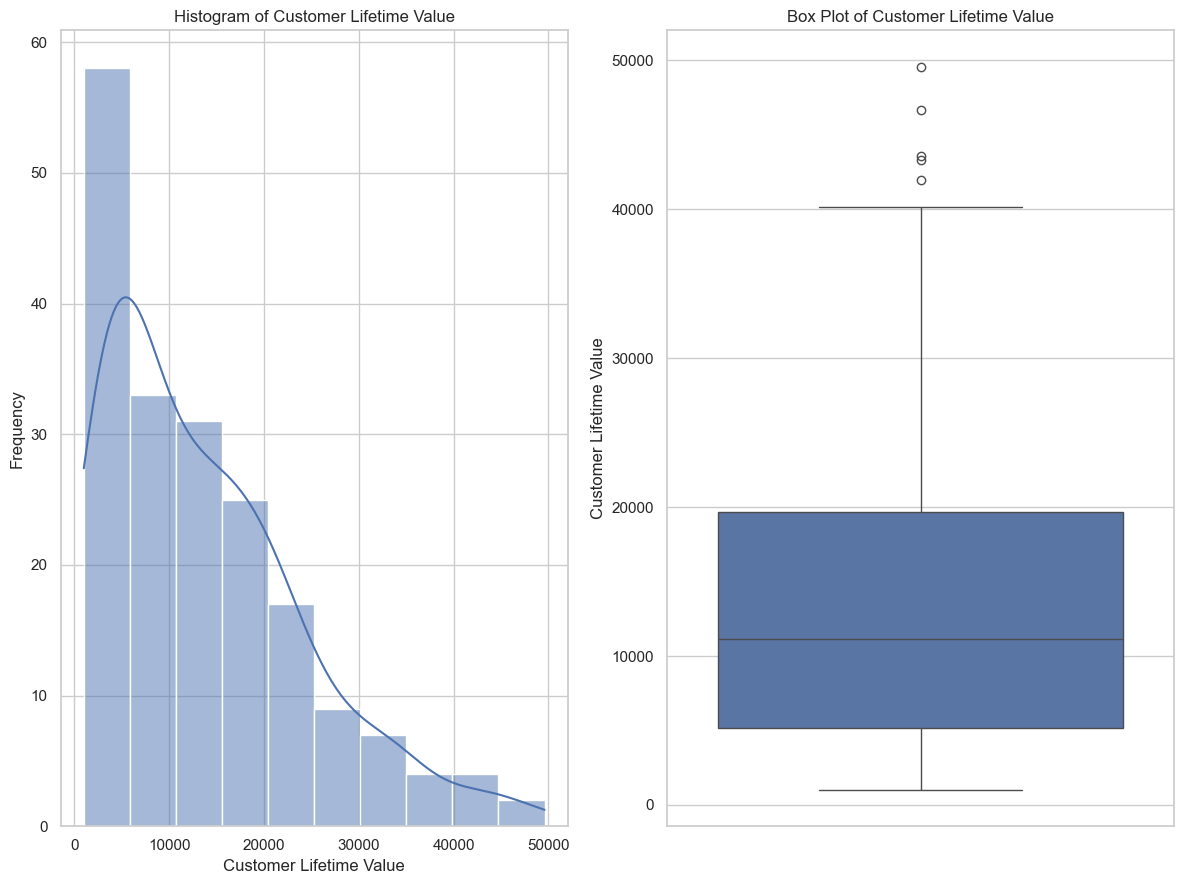

In [28]:
plt.subplot(1, 2, 1) 
sns.histplot(new_customer['customer_lifetime_value'], bins=10, kde=True)
plt.title('Histogram of Customer Lifetime Value')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  
sns.boxplot(y=new_customer['customer_lifetime_value'])
plt.title('Box Plot of Customer Lifetime Value')
plt.ylabel('Customer Lifetime Value')

plt.tight_layout() 
plt.show()

## What factors (e.g., payment method, discounts applied) have the most significant impact on CLV?

In [29]:
data['customer_lifetime_value'] = data['order_frequency'] * data['order_value']

In [30]:
factors_data = data[['customer_tenure', 'customer_location', 'customer_type', 'order_date', 'payment_method',
       'discount_applied', 'return_status', 'product_category', 'size', 'inventory_status', 'source',
       'engagement_score', 'tenure_category', 'customer_lifetime_value']]

In [31]:
factors_data['tenure_category'] = factors_data.loc[:,'tenure_category'].astype("object")

In [32]:
categoricalFeatures = [col for col in factors_data.columns if factors_data[col].dtype == 'O'] 
categoricalFeatures

['customer_location',
 'customer_type',
 'order_date',
 'payment_method',
 'return_status',
 'product_category',
 'size',
 'inventory_status',
 'source',
 'tenure_category']

In [33]:
ordinalEncoder = OrdinalEncoder()

In [34]:
for col in categoricalFeatures:
    factors_data.loc[:,col] = ordinalEncoder.fit_transform(factors_data[[col]])

In [35]:
factors_data.sample(5)

,customer_tenure,customer_location,customer_type,order_date,payment_method,discount_applied,return_status,product_category,size,inventory_status,source,engagement_score,tenure_category,customer_lifetime_value
444,60,1.0,1.0,103.0,3.0,0,1.0,0.0,1.0,1.0,2.0,76,0.0,16078.00
720,24,2.0,1.0,330.0,3.0,30,0.0,0.0,2.0,0.0,3.0,15,1.0,15091.44
727,13,2.0,1.0,223.0,2.0,30,0.0,0.0,2.0,0.0,2.0,40,3.0,4500.00
229,13,2.0,1.0,192.0,0.0,15,0.0,3.0,0.0,0.0,2.0,39,3.0,1000.00
659,60,7.0,1.0,37.0,0.0,10,0.0,0.0,2.0,0.0,2.0,10,0.0,27006.64


In [36]:
X = factors_data.drop(columns=['order_date', 'customer_lifetime_value'])
y = factors_data['customer_lifetime_value']

In [37]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=32)

In [38]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((800, 12), (200, 12), (800,), (200,))

In [39]:
lasso_model = Lasso(alpha=100)
lasso_model.fit(xtrain, ytrain)

predictions = lasso_model.predict(xtest)

coefficients = pd.DataFrame({'Columns': X.columns,'Importance': lasso_model.coef_})
coefficients

,Columns,Importance
0,customer_tenure,-4.379044
1,customer_location,-194.274194
2,customer_type,-0.000000
3,payment_method,0.000000
4,discount_applied,-3.742919
5,return_status,224.125711
6,product_category,-7.214523
7,size,-315.862961
8,inventory_status,0.000000
9,source,98.960029


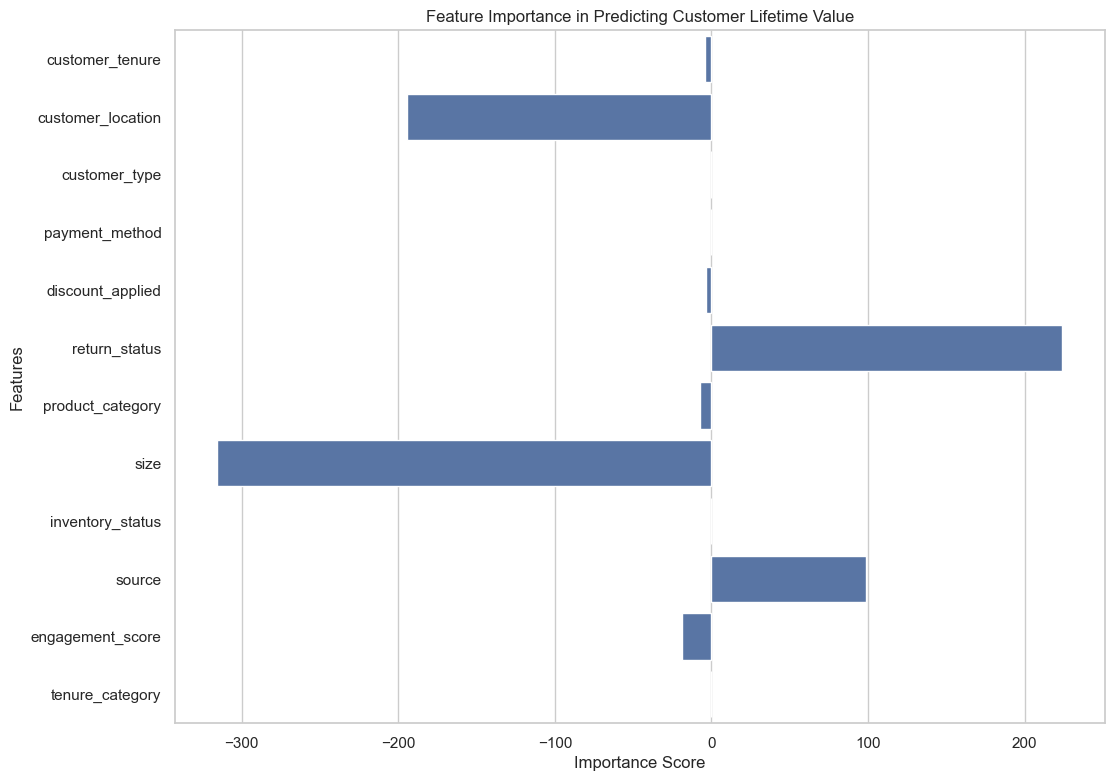

In [40]:
sns.barplot(x='Importance', y='Columns', data=coefficients)
plt.title('Feature Importance in Predicting Customer Lifetime Value')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

## Sales Performance
## Top-Performing Products
### Which product categories generate the highest revenue?

In [41]:
# Which product categories generate the highest revenue?
highest_revenue = data.groupby('product_category')['order_value'].sum().sort_values(ascending=False).reset_index()
highest_revenue

,product_category,order_value
0,Jackets,487692.11
1,Shirts,443247.27
2,Jeans,431396.90
3,T-Shirts,429779.54
4,Dresses,407475.19
5,Sweatshirts,400964.05


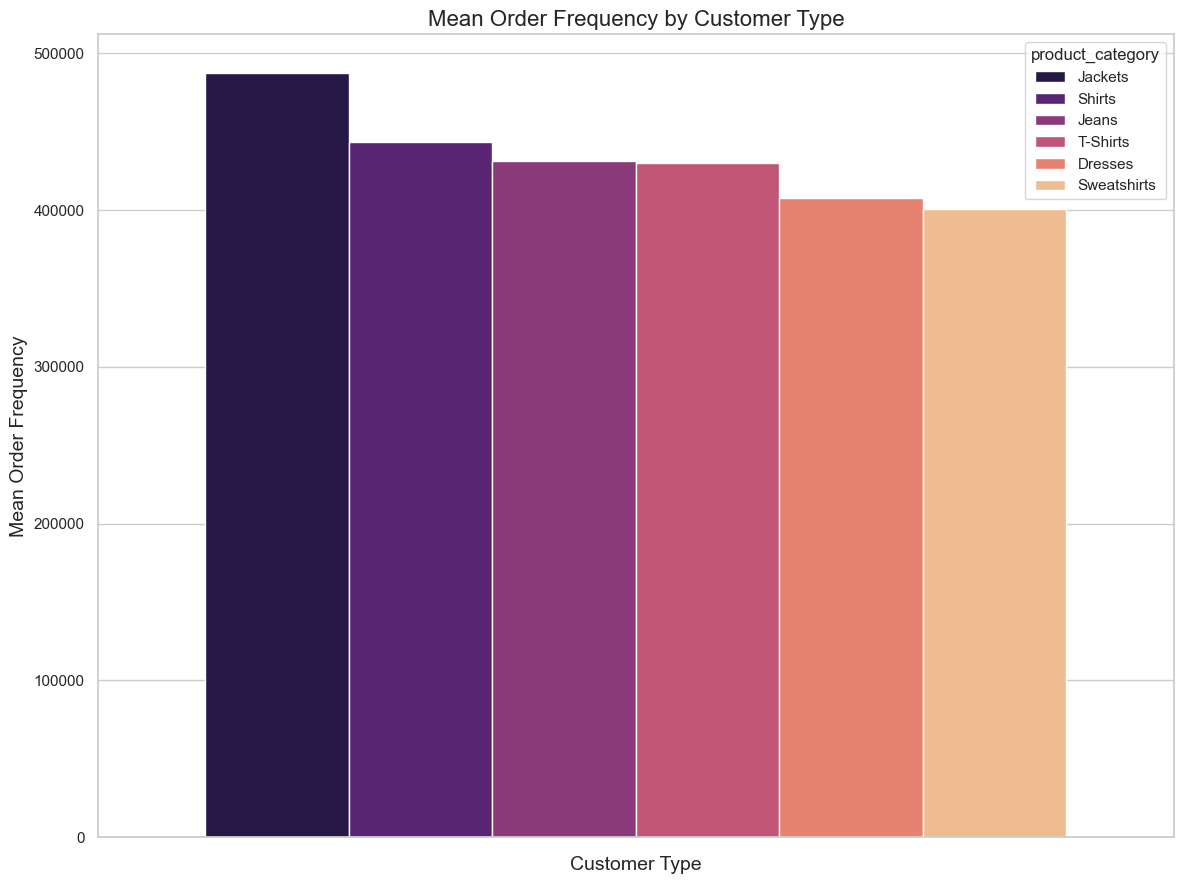

In [42]:
sns.barplot(hue='product_category', y='order_value', data=highest_revenue, palette='magma', legend=True)

plt.title('Mean Order Frequency by Customer Type', fontsize=16)
plt.xlabel('Customer Type', fontsize=14)
plt.ylabel('Mean Order Frequency', fontsize=14)

plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

### What are the top-selling products by order value and frequency?

In [43]:
# What are the top-selling products by order value and frequency?
top_selling_product_ordervalue = data.groupby('product_category')['order_value'].sum().sort_values(ascending=False).reset_index()
top_selling_product_ordervalue

,product_category,order_value
0,Jackets,487692.11
1,Shirts,443247.27
2,Jeans,431396.90
3,T-Shirts,429779.54
4,Dresses,407475.19
5,Sweatshirts,400964.05


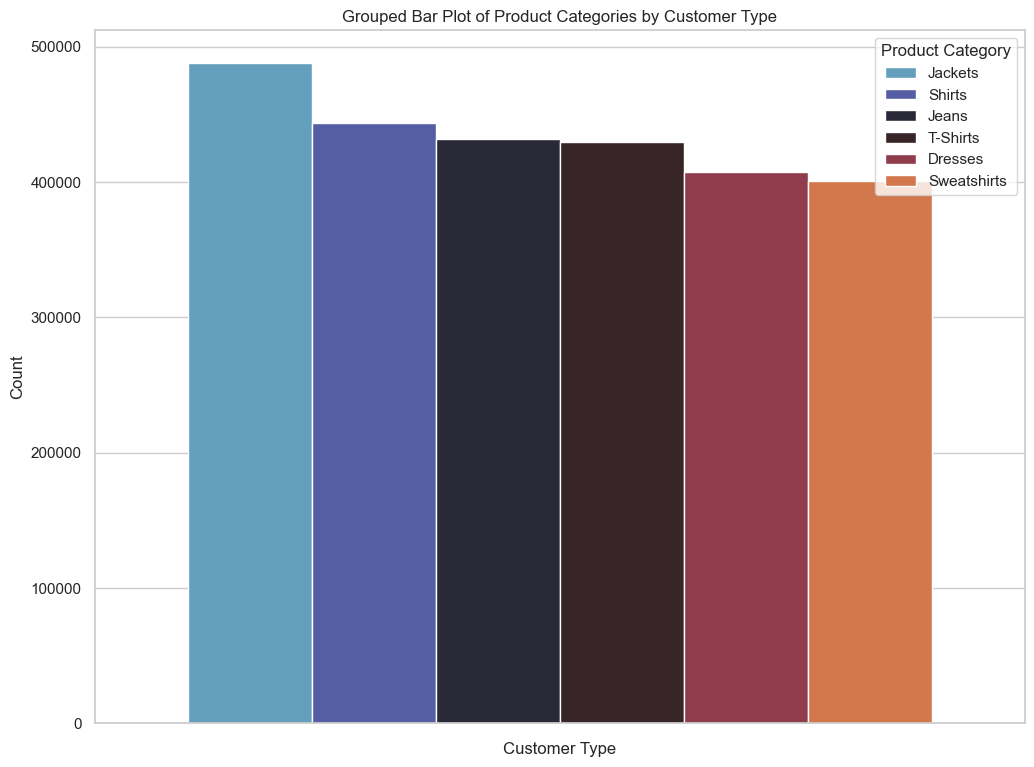

In [44]:
sns.barplot(hue='product_category', y='order_value', data=top_selling_product_ordervalue, palette='icefire', legend=True)
plt.title('Grouped Bar Plot of Product Categories by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Product Category')
plt.show()

In [45]:
# What are the top-selling products by order value and frequency?
top_selling_product_orderfrequency = data.groupby('product_category')['order_frequency'].sum().sort_values(ascending=False).reset_index()
top_selling_product_orderfrequency

,product_category,order_frequency
0,T-Shirts,885
1,Jackets,877
2,Dresses,853
3,Jeans,842
4,Shirts,833
5,Sweatshirts,742


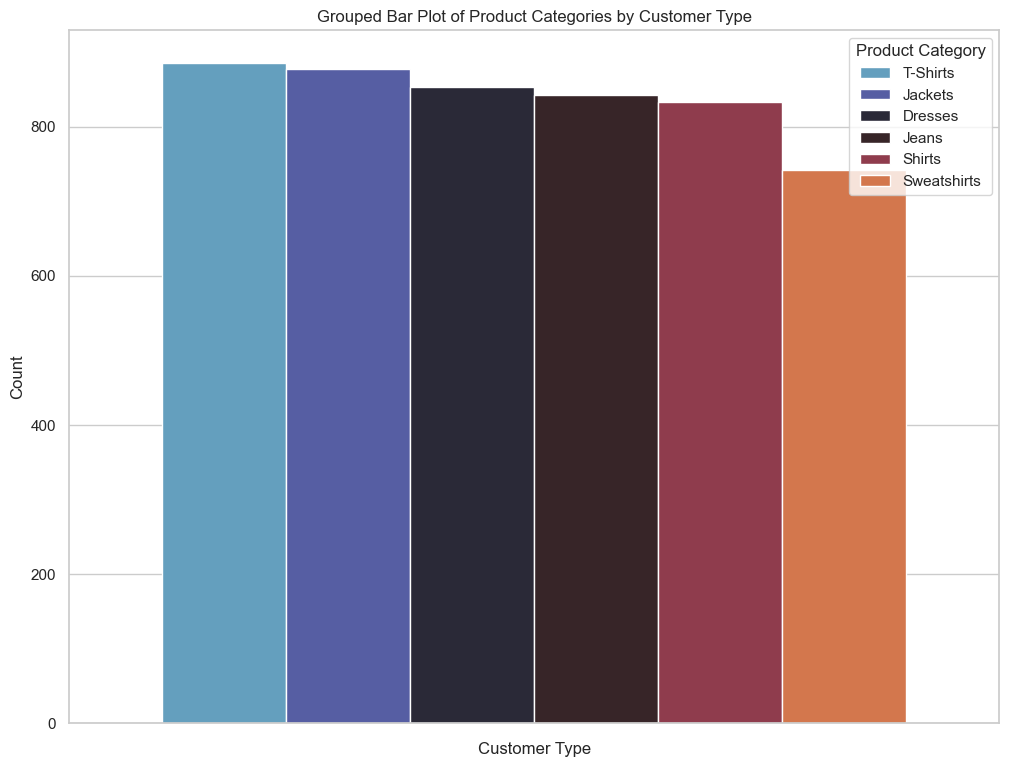

In [46]:
sns.barplot(hue='product_category', y='order_frequency', data=top_selling_product_orderfrequency, palette='icefire', legend=True)
plt.title('Grouped Bar Plot of Product Categories by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Product Category')
plt.show()

## Revenue Drivers

### What payment methods are associated with higher order values?

In [47]:
# What payment methods are associated with higher order values?
highest_order_payment_method = data.groupby('payment_method')['order_value'].sum().sort_values(ascending=False).reset_index()
highest_order_payment_method

,payment_method,order_value
0,COD,555251.52
1,Net Banking,541677.41
2,Wallet,513886.51
3,Credit Card,496432.84
4,UPI,493306.78


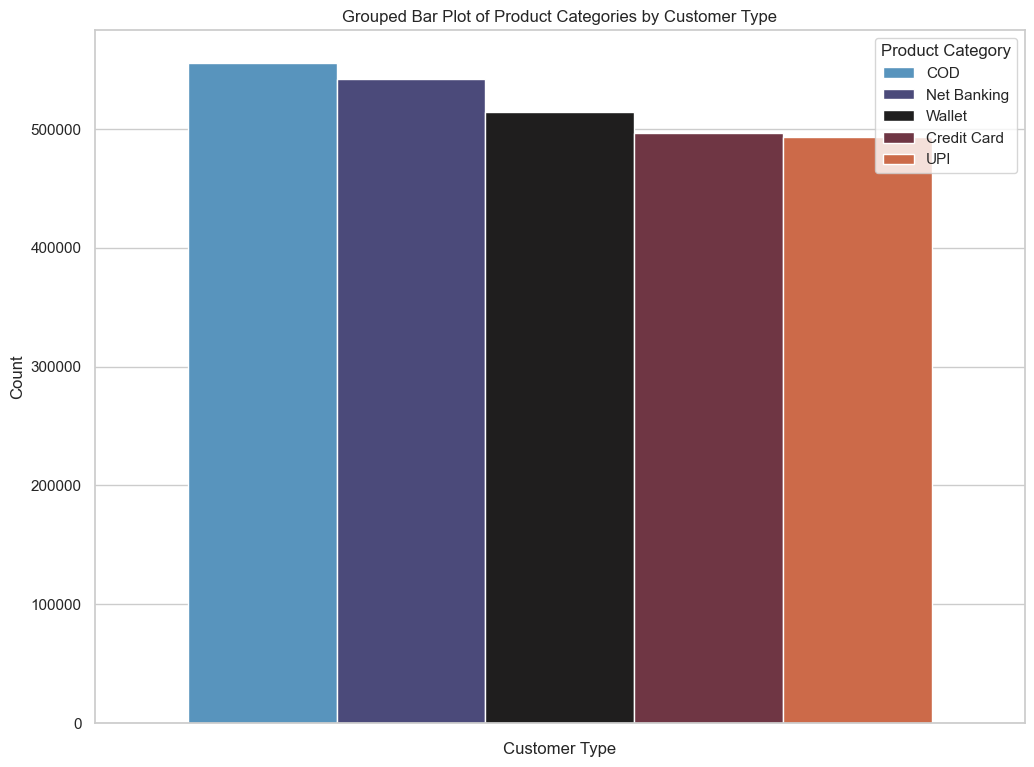

In [48]:
sns.barplot(hue='payment_method', y='order_value', data=highest_order_payment_method, palette='icefire', legend=True)
plt.title('Grouped Bar Plot of Product Categories by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Product Category')
plt.show()

### How do discounts applied affect overall sales performance?

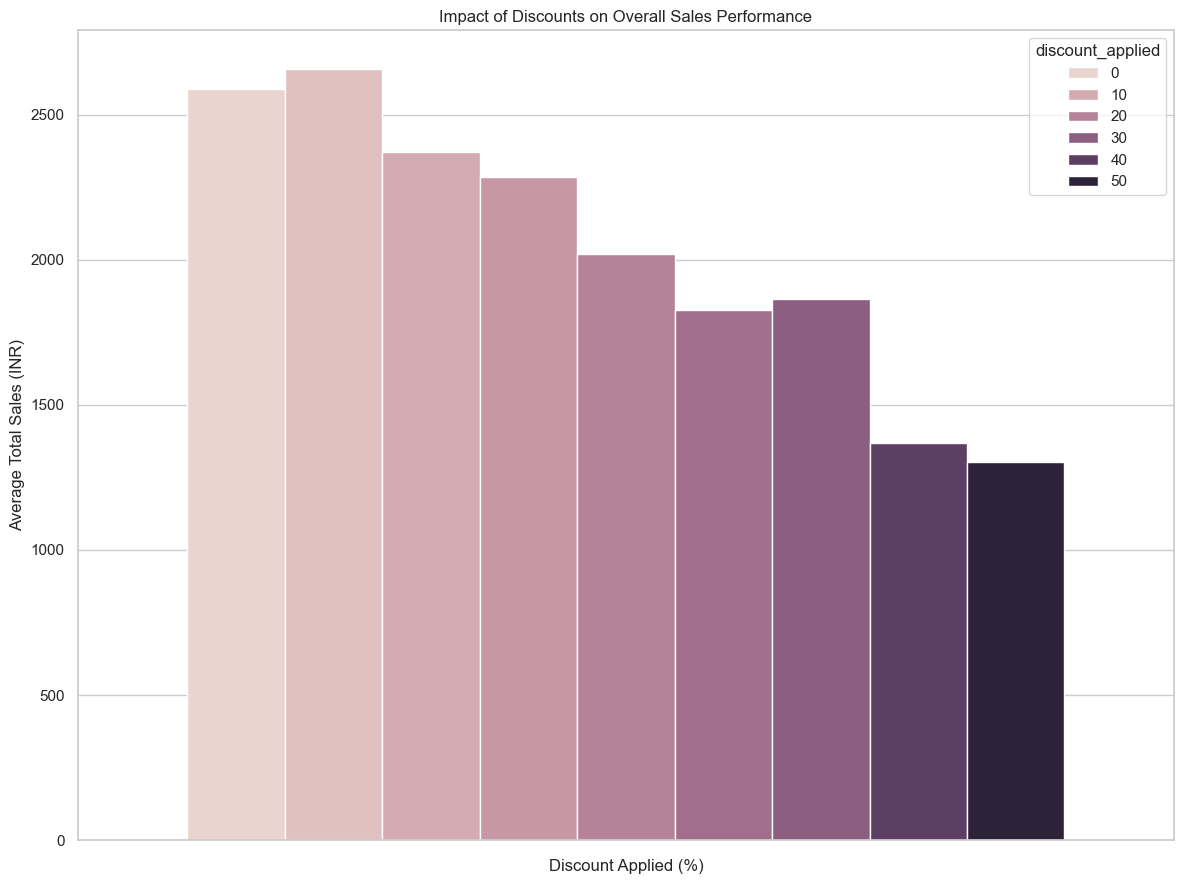

In [49]:
data['total_sales'] = data['order_value'] * (1 - data['discount_applied'] / 100)
sales_per_discount = data.groupby('discount_applied')['total_sales'].mean().reset_index()

sns.barplot(hue='discount_applied', y='total_sales', data=sales_per_discount)
plt.title('Impact of Discounts on Overall Sales Performance')
plt.xlabel('Discount Applied (%)')
plt.ylabel('Average Total Sales (INR)')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

## Marketing Effectiveness
## Impact of Marketing Channels
### Which marketing channels (e.g., Instagram, Google Ads) lead to higher conversion rates?

In [50]:
# Which marketing channels (e.g., Instagram, Google Ads) lead to higher conversion rates?
conversion_counts = data.groupby('source').size().reset_index(name='total_conversions')
conversion_counts

,source,total_conversions
0,Email Marketing,219
1,Facebook Ads,219
2,Google Ads,185
3,Instagram,187
4,Word of Mouth,190


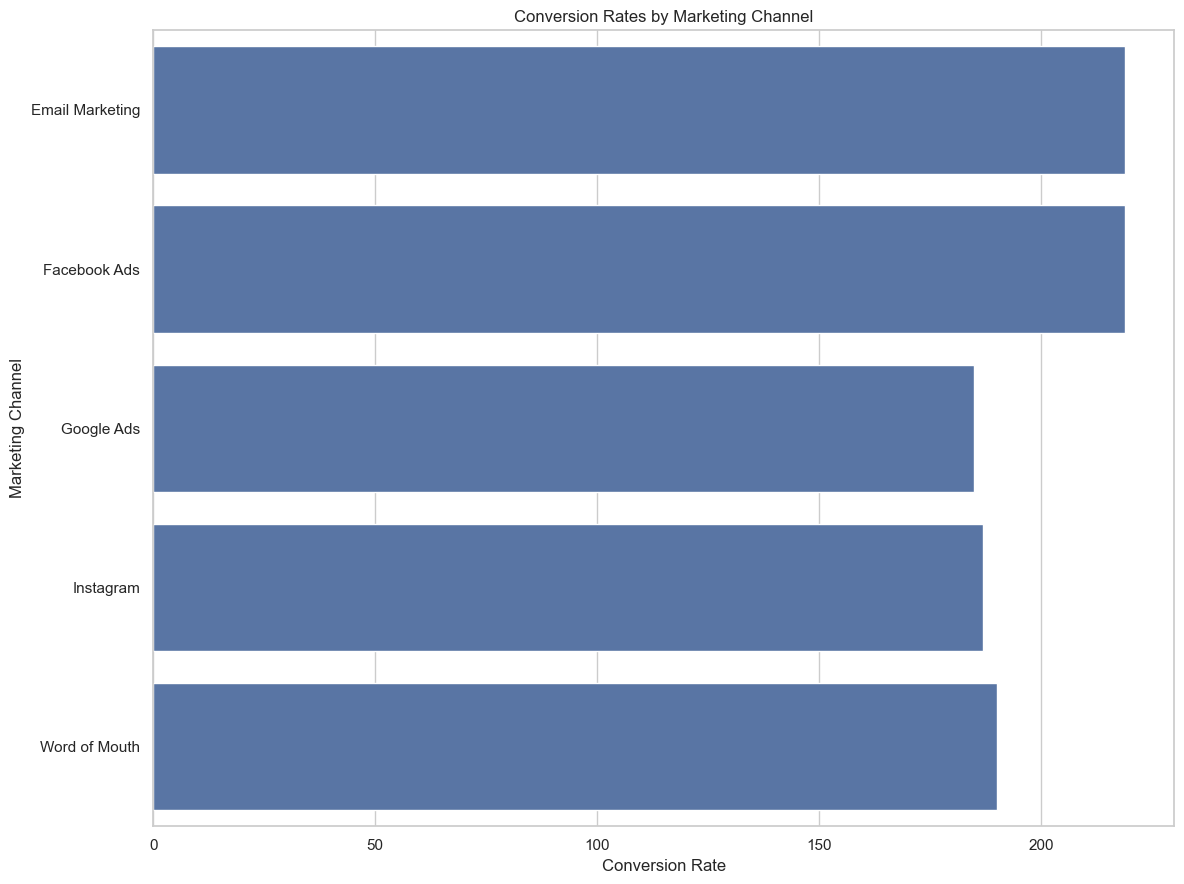

In [51]:
sns.barplot(x='total_conversions', y='source', data=conversion_counts)
plt.title('Conversion Rates by Marketing Channel')
plt.xlabel('Conversion Rate')
plt.ylabel('Marketing Channel')
plt.tight_layout() 
plt.show()

### How do engagement scores vary among customers acquired through different marketing channels?

In [52]:
# How do engagement scores vary among customers acquired through different marketing channels
average_engagement_scores = data.groupby('source')['engagement_score'].mean().reset_index()
average_engagement_scores

,source,engagement_score
0,Email Marketing,50.191781
1,Facebook Ads,48.648402
2,Google Ads,52.745946
3,Instagram,51.058824
4,Word of Mouth,49.910526


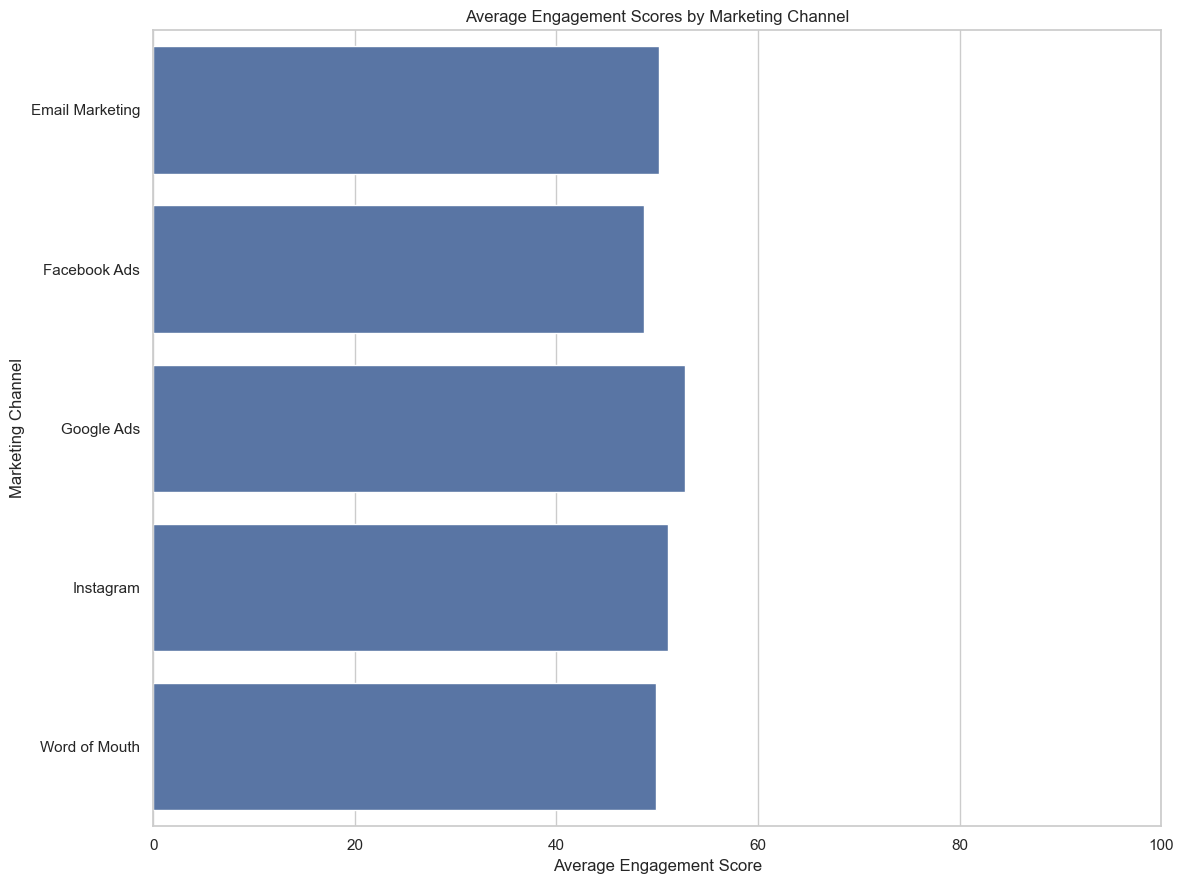

In [53]:
sns.barplot(x='engagement_score', y='source', data=average_engagement_scores)
plt.title('Average Engagement Scores by Marketing Channel')
plt.xlabel('Average Engagement Score')
plt.ylabel('Marketing Channel')
plt.xlim(0, 100)  
plt.tight_layout()  
plt.show()

## Channel Performance Analysis
### What is the average order value for customers acquired through each marketing channel?

In [54]:
average_order_value = data.groupby('source')['order_value'].mean().sort_values(ascending=False).reset_index()
average_order_value

,source,order_value
0,Word of Mouth,2804.217053
1,Instagram,2593.782246
2,Google Ads,2551.568486
3,Email Marketing,2541.804201
4,Facebook Ads,2529.777397


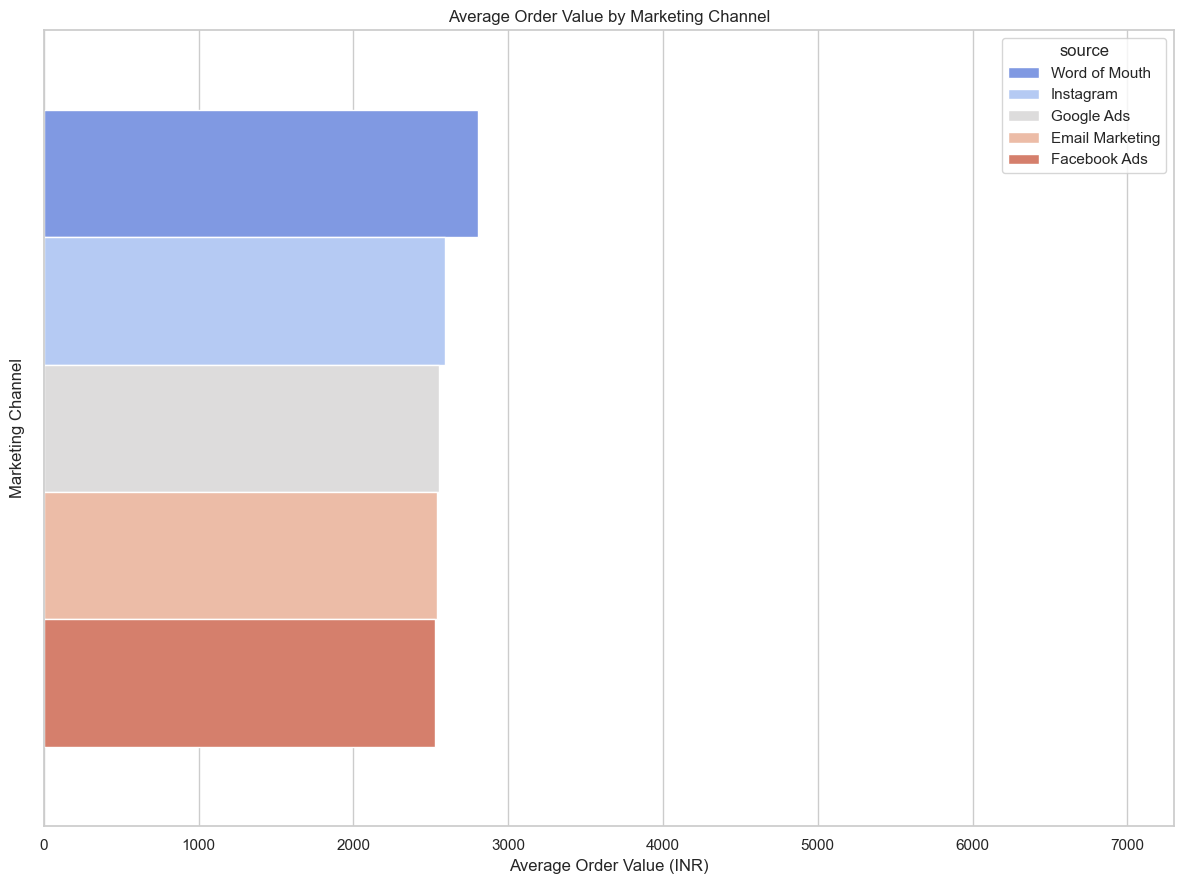

In [55]:
sns.barplot(x='order_value', hue='source', data=average_order_value, palette='coolwarm')
plt.title('Average Order Value by Marketing Channel')
plt.xlabel('Average Order Value (INR)')
plt.ylabel('Marketing Channel')
plt.xlim(0, data['order_value'].max() + 50) 
plt.tight_layout() 
plt.show()

### Are there differences in return rates based on the marketing channel used for acquisition?

## Return Analysis
## Correlation Between Discounts and Returns
### Is there a relationship between the amount of discount applied and return rates?

In [56]:
# Is there a relationship between the amount of discount applied and return rates?
data['return_status'] = data['customer_type'].apply(lambda x: 'Yes' if x == 'Returning' else 'No')

return_counts = data.groupby('discount_applied')['return_status'].value_counts().unstack(fill_value=0)
return_counts['return_rate'] = return_counts['Yes'] / (return_counts['Yes'] + return_counts['No']) * 100

return_rates = return_counts[['return_rate']].reset_index()
return_rates

return_status,discount_applied,return_rate
0,0,80.936455
1,5,83.783784
2,10,86.363636
3,15,77.192982
4,20,75.728155
5,25,82.417582
6,30,80.000000
7,40,91.304348
8,50,75.000000


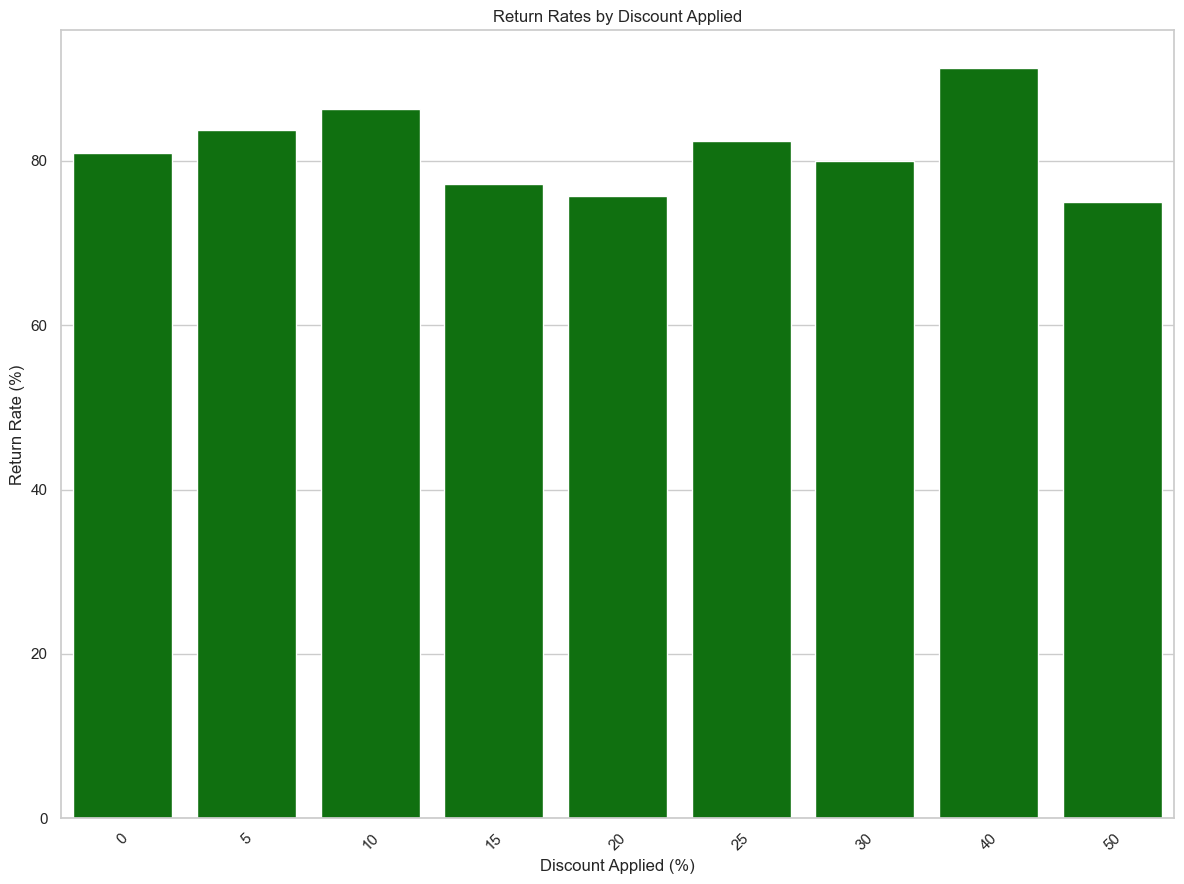

In [57]:
sns.barplot(x='discount_applied', y='return_rate', data=return_rates, color='green')
plt.title('Return Rates by Discount Applied')
plt.xlabel('Discount Applied (%)')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

### How do return rates differ across various product categories?

In [58]:
# How do return rates differ across various product categories?
data['return_status'] = data['customer_type'].apply(lambda x: 'Yes' if x == 'Returning' else 'No')

return_counts = data.groupby('product_category')['return_status'].value_counts().unstack(fill_value=0)
return_counts['return_rate'] = return_counts['Yes'] / (return_counts['Yes'] + return_counts['No']) * 100

return_rates = return_counts[['return_rate']].reset_index()
return_rates

return_status,product_category,return_rate
0,Dresses,82.530120
1,Jackets,77.714286
2,Jeans,84.393064
3,Shirts,79.881657
4,Sweatshirts,79.729730
5,T-Shirts,81.656805


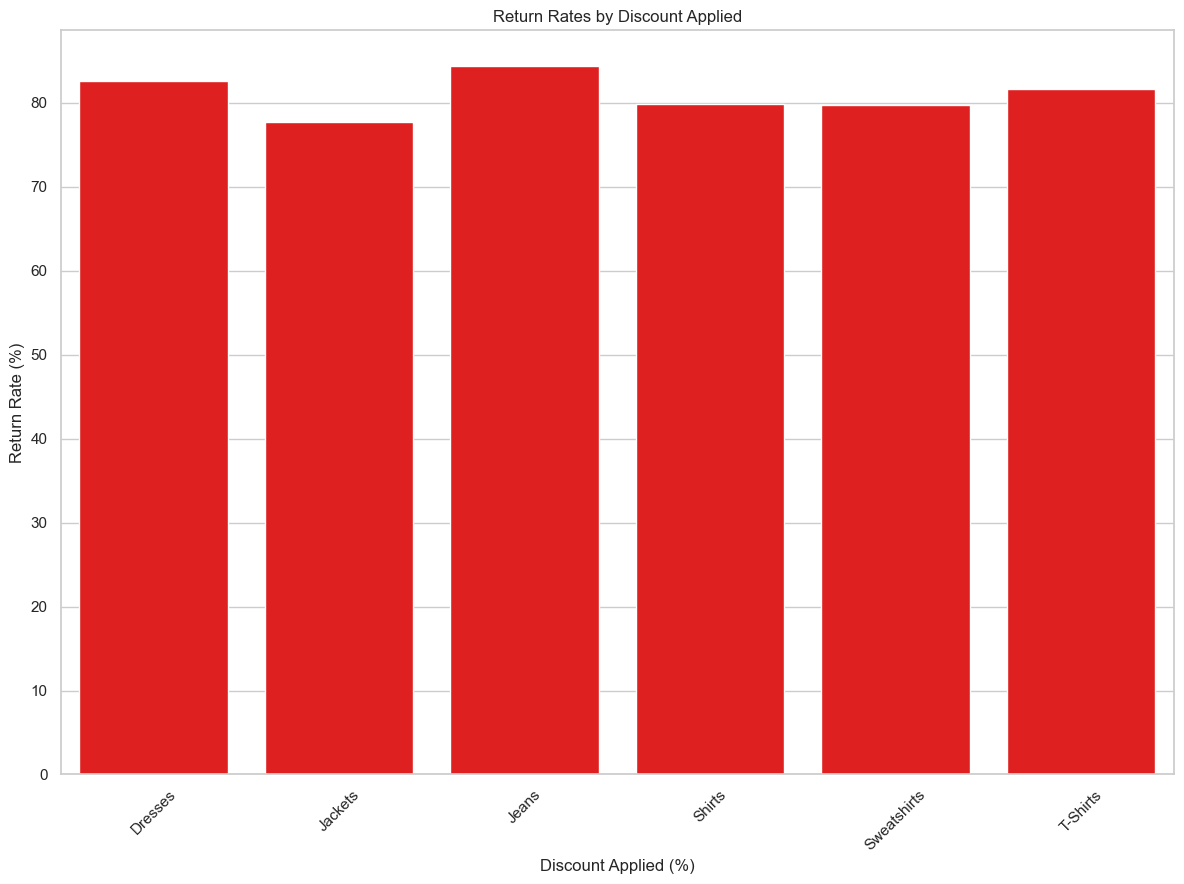

In [59]:
sns.barplot(x='product_category', y='return_rate', data=return_rates, color='red')
plt.title('Return Rates by Discount Applied')
plt.xlabel('Discount Applied (%)')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

## Return Status Insights
### What are the common characteristics of products that have high return rates (e.g., size, inventory status)?

In [60]:
# What are the common characteristics of products that have high return rates (e.g., size, inventory status)?
return_counts = data.groupby(['size', 'inventory_status'])['return_status'].value_counts().unstack(fill_value=0)
return_counts['return_rate'] = return_counts['Yes'] / (return_counts['Yes'] + return_counts['No']) * 100

return_rates = return_counts[['return_rate']].reset_index()
return_rates

return_status,size,inventory_status,return_rate
0,L,In Stock,86.390533
1,L,Out of Stock,76.470588
2,M,In Stock,77.325581
3,M,Out of Stock,84.000000
4,S,In Stock,78.921569
5,S,Out of Stock,96.551724
6,XL,In Stock,76.190476
7,XL,Out of Stock,83.333333
8,XXL,In Stock,82.795699
9,XXL,Out of Stock,91.666667


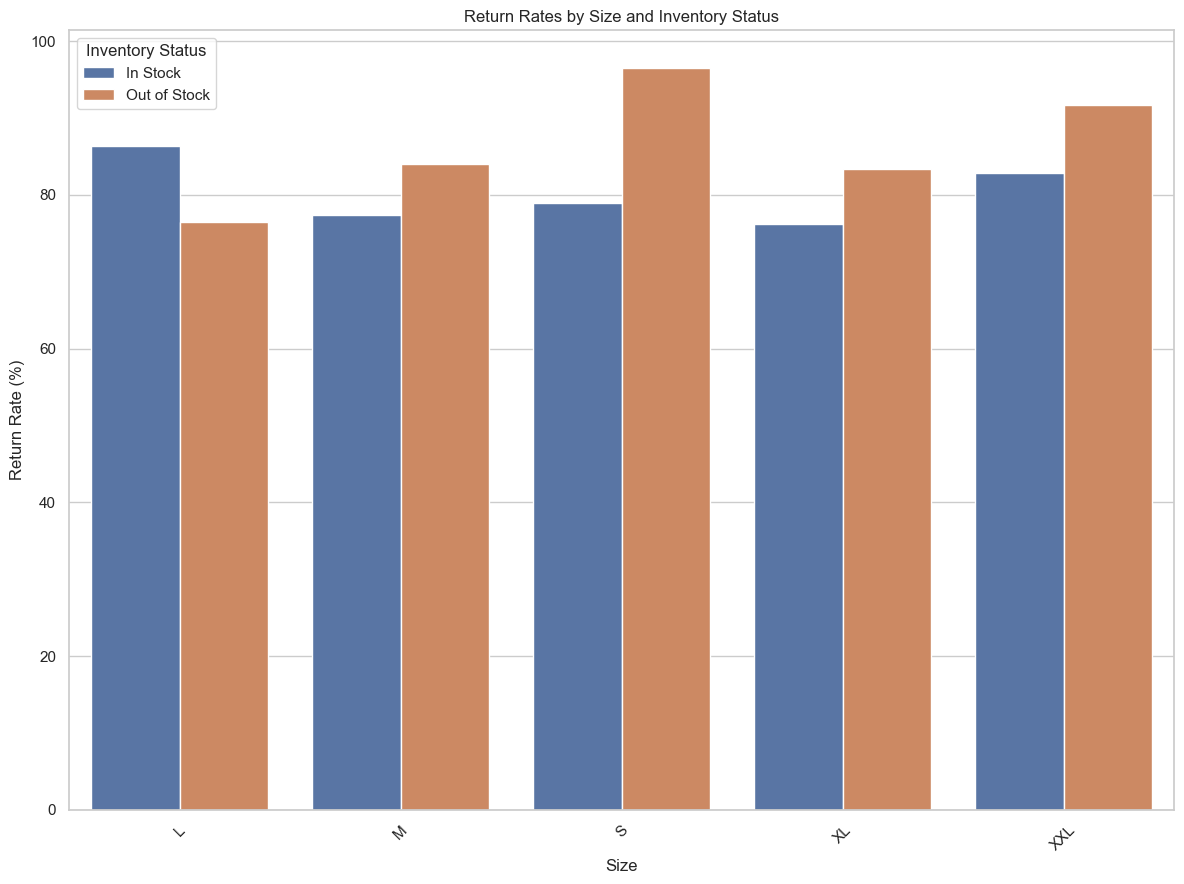

In [61]:
sns.barplot(x='size', y='return_rate', hue='inventory_status', data=return_rates)
plt.title('Return Rates by Size and Inventory Status')
plt.xlabel('Size')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Inventory Status')
plt.tight_layout() 
plt.show()

### How does customer tenure affect return behavior?

In [62]:
# What are the common characteristics of products that have high return rates (e.g., size, inventory status)?
return_counts = data.groupby('customer_tenure')['return_status'].value_counts().unstack(fill_value=0)
return_counts['return_rate'] = return_counts['Yes'] / (return_counts['Yes'] + return_counts['No']) * 100

return_rates = return_counts[['return_rate']].reset_index()
return_rates

return_status,customer_tenure,return_rate
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
5,6,0.0
6,7,0.0
7,8,0.0
8,9,0.0
9,10,0.0


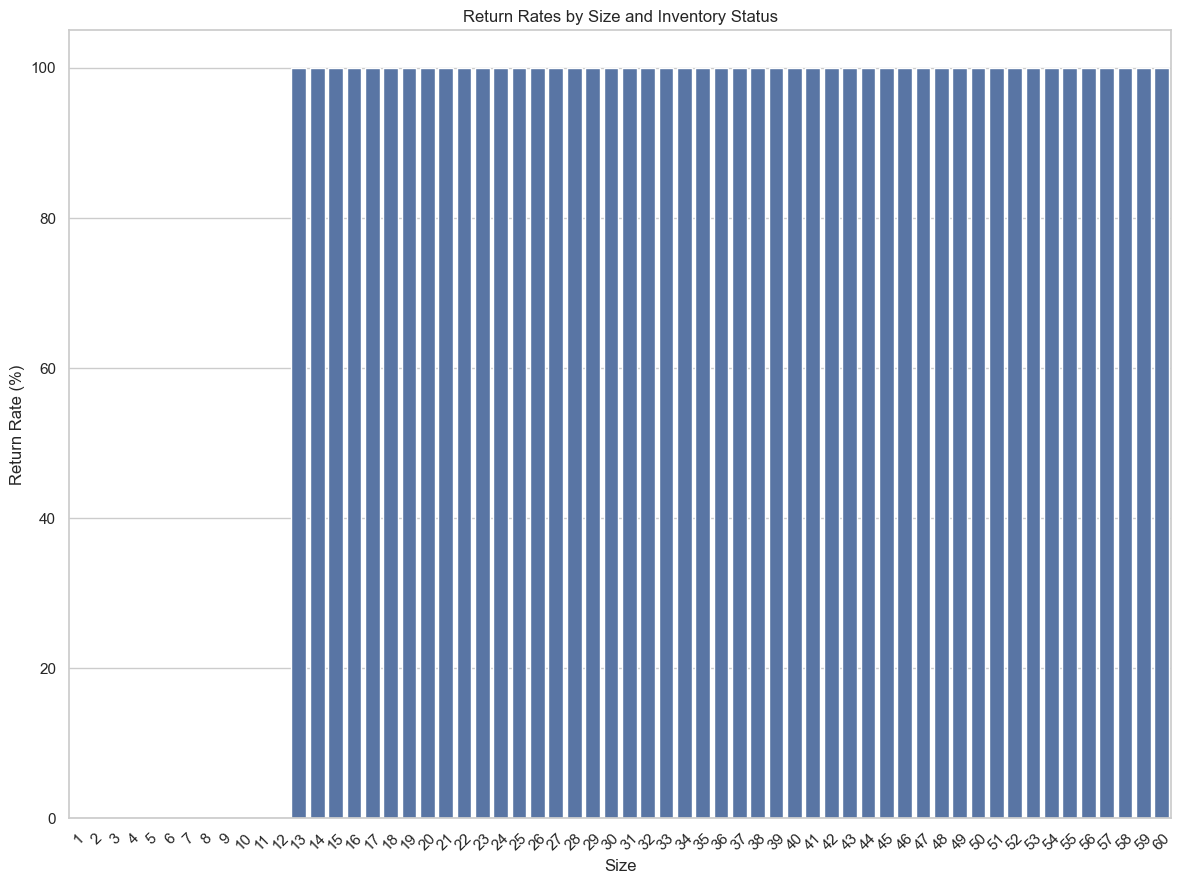

In [63]:
sns.barplot(x='customer_tenure', y='return_rate', data=return_rates)
plt.title('Return Rates by Size and Inventory Status')
plt.xlabel('Size')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

## Inventory Insights
## Stockout Risks
### Which products are at risk of stockouts based on current inventory levels and order frequency?

In [64]:
# Which products are at risk of stockouts based on current inventory levels and order frequency?
mean_order_frequency = data['order_frequency'].mean()
data['risk_of_stockout'] = (data['inventory_status'] == 'In Stock') & (data['order_frequency'] > mean_order_frequency)

products_at_risk = data[data['risk_of_stockout'] == True][['order_frequency', 'inventory_status', 'product_category']]
inventory_data = products_at_risk.groupby(['product_category', 'inventory_status'])['order_frequency'].count().reset_index()
inventory_data

,product_category,inventory_status,order_frequency
0,Dresses,In Stock,69
1,Jackets,In Stock,75
2,Jeans,In Stock,69
3,Shirts,In Stock,66
4,Sweatshirts,In Stock,61
5,T-Shirts,In Stock,74


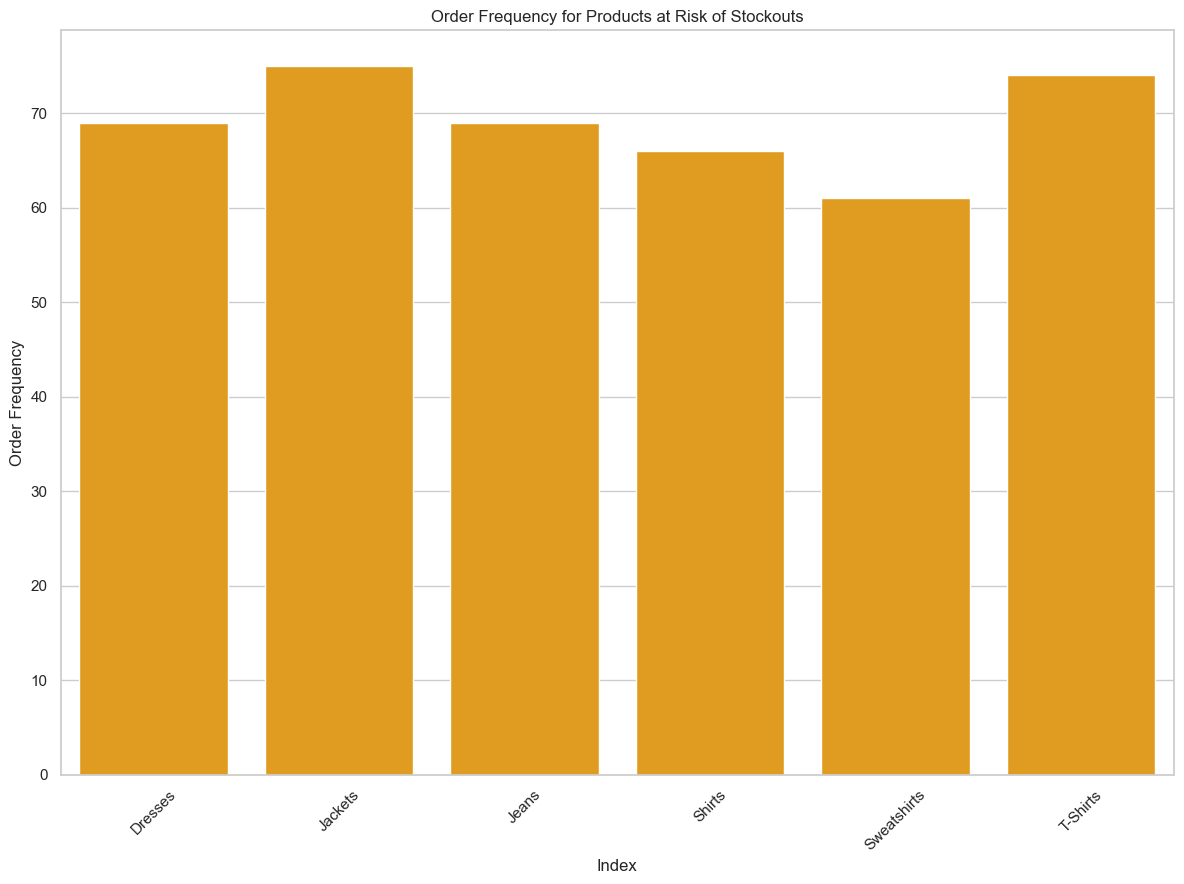

In [65]:
sns.barplot(x='product_category', y='order_frequency', data=inventory_data, color='orange')
plt.title('Order Frequency for Products at Risk of Stockouts')
plt.xlabel('Index')
plt.ylabel('Order Frequency')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

### How can we identify trends in inventory status that may indicate potential stockout risks?

In [66]:
# How can we identify trends in inventory status that may indicate potential stockout risks?
inventory_trends = data.groupby(['product_category', 'inventory_status']).size().unstack(fill_value=0)
inventory_trends

inventory_status,In Stock,Out of Stock
product_category,,
Dresses,145,21
Jackets,157,18
Jeans,152,21
Shirts,159,10
Sweatshirts,136,12
T-Shirts,150,19


In [67]:
inventory_trends_percentage = inventory_trends.div(inventory_trends.sum(axis=1), axis=0) * 100
inventory_trends_percentage

inventory_status,In Stock,Out of Stock
product_category,,
Dresses,87.349398,12.650602
Jackets,89.714286,10.285714
Jeans,87.861272,12.138728
Shirts,94.082840,5.917160
Sweatshirts,91.891892,8.108108
T-Shirts,88.757396,11.242604


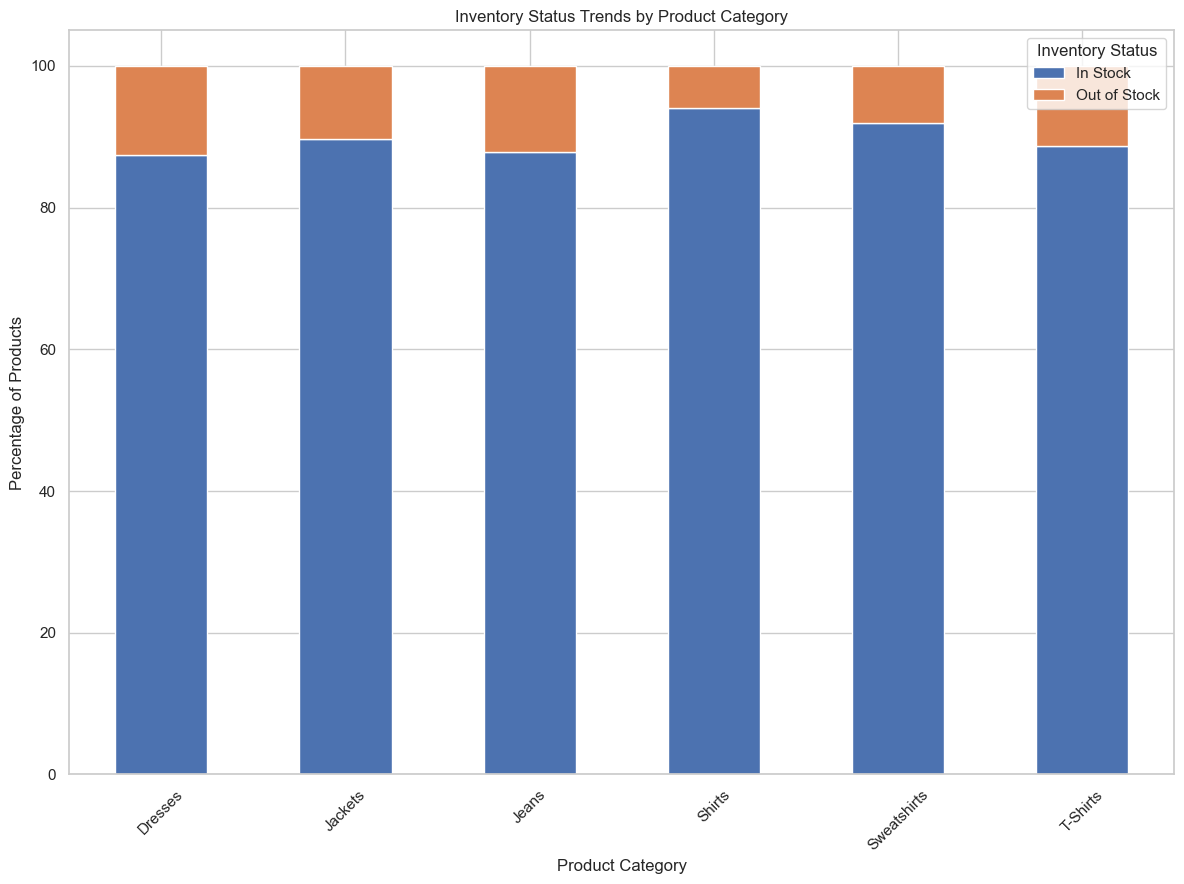

In [68]:
inventory_trends_percentage.plot(kind='bar', stacked=True)
plt.title('Inventory Status Trends by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Percentage of Products')
plt.xticks(rotation=45)
plt.legend(title='Inventory Status')
plt.tight_layout() 
plt.show()

## Predictive Model for Inventory Optimization
### What factors should be included in a predictive model to optimize inventory levels?

In [69]:
predictive_model = data[[ 'customer_tenure', 'customer_location', 'customer_type',  'order_value', 'payment_method',
       'order_frequency', 'discount_applied', 'return_status', 'product_category', 'size', 'inventory_status', 'source', 'engagement_score',
       'tenure_category', 'customer_lifetime_value', 'total_sales', 'risk_of_stockout']]

In [70]:
predictive_model['tenure_category'] = predictive_model['tenure_category'].astype('object')

In [71]:
categoricalColumns = [col for col in predictive_model.columns if predictive_model[col].dtype == 'O']
categoricalColumns.remove('inventory_status')
categoricalColumns

['customer_location',
 'customer_type',
 'payment_method',
 'return_status',
 'product_category',
 'size',
 'source',
 'tenure_category']

In [72]:
for col in categoricalColumns:
    predictive_model.loc[:,col] = ordinalEncoder.fit_transform(predictive_model[[col]])

In [73]:
predictive_model['risk_of_stockout'] = predictive_model['risk_of_stockout'].replace({True:1, False:0})

In [74]:
labelEncoder = LabelEncoder()

predictive_model['inventory_status'] = labelEncoder.fit_transform(predictive_model['inventory_status'])

In [75]:
X = predictive_model.drop(columns = 'inventory_status')
y = predictive_model['inventory_status']

In [76]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=32)

In [77]:
rf_model = RandomForestClassifier()
rf_model.fit(xtrain, ytrain)

RandomForestClassifier()

In [78]:
factors_data = pd.DataFrame({'Columns': X.columns, 'Importance': rf_model.feature_importances_})
factors_data

,Columns,Importance
0,customer_tenure,0.075110
1,customer_location,0.046359
2,customer_type,0.005217
3,order_value,0.078541
4,payment_method,0.031194
5,order_frequency,0.169052
6,discount_applied,0.042894
7,return_status,0.006437
8,product_category,0.039493
9,size,0.029754


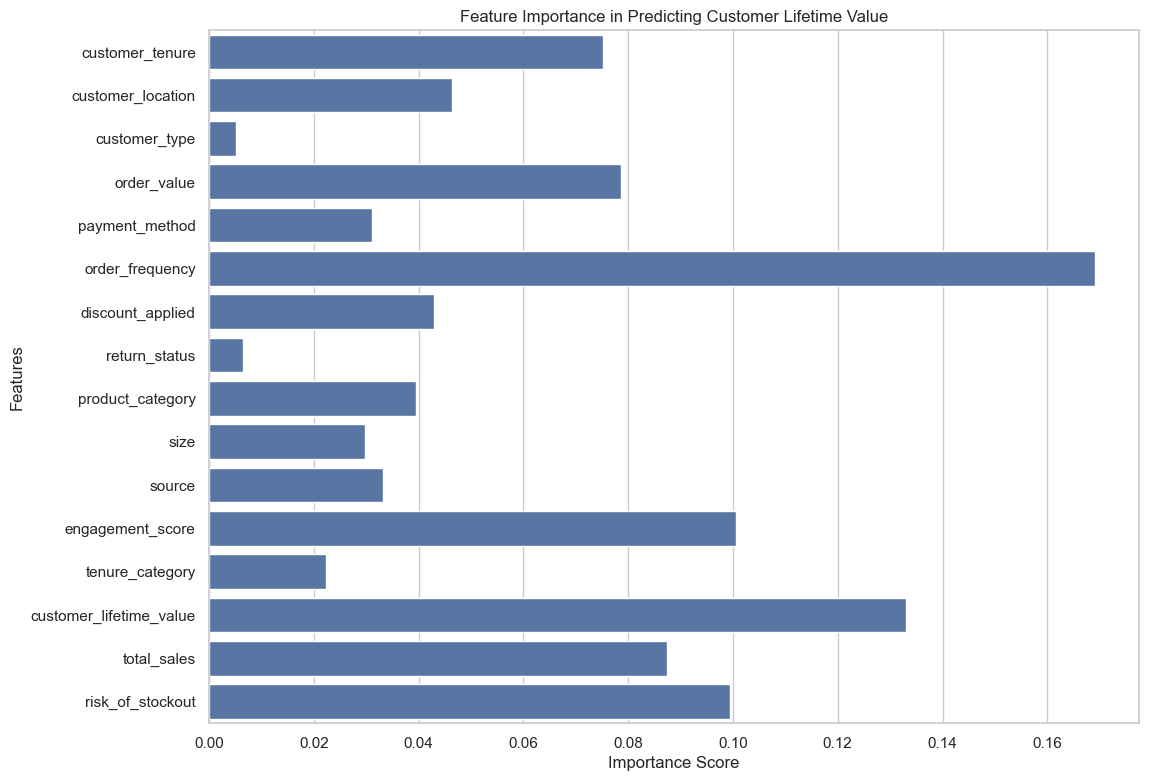

In [79]:
sns.barplot(x='Importance', y='Columns', data=factors_data)
plt.title('Feature Importance in Predicting Customer Lifetime Value')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [80]:
data.to_csv('Analysis_Data.csv', index=False)